In [96]:
import requests
import re
import json
import pandas as pd
import altair

In [20]:
page = requests.get("http://projects.fivethirtyeight.com/2016-election-forecast/").text


In [70]:
[regex_result] = filter(None, (re.search("race.stateData = (.*);", line) for line in page.split("\n")))


In [71]:
data = regex_result.group(1)

In [72]:
parsed_json = json.loads(data)

In [74]:
parsed_json

{'candidates': [{'candidate': 'Clinton', 'party': 'D'},
  {'candidate': 'Trump', 'party': 'R'},
  {'candidate': 'Johnson', 'party': 'L'}],
 'forecasts': {'all': [{'candidate': 'Clinton',
    'date': '2016-08-01',
    'models': {'now': {'distribution': [0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       1.9004524886877828e-06,
       3.9366515837104075e-06,
       5.520361990950226e-06,
       6.65158371040724e-06,
       7.330316742081449e-06,
       7.55656108597285e-06,
       2.7149321266968395e-07,
       5.475113122171946e-06,
       5.79185520361991

In [78]:
all_forecasts = parsed_json['forecasts']['all']

In [80]:
len(all_forecasts)

165

In [81]:
one_forecast = all_forecasts[0]

In [89]:
one_forecast.keys()

dict_keys(['models', 'candidate', 'date', 'party'])

In [87]:
one_forecast

{'candidate': 'Clinton',
 'date': '2016-08-01',
 'models': {'now': {'distribution': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1.9004524886877828e-06,
    3.9366515837104075e-06,
    5.520361990950226e-06,
    6.65158371040724e-06,
    7.330316742081449e-06,
    7.55656108597285e-06,
    2.7149321266968395e-07,
    5.475113122171946e-06,
    5.79185520361991e-06,
    4.162895927601811e-06,
    1.0135746606334843e-05,
    5.746606334841629e-06,
    0,
    3.316742081447964e-05,
    4.045248868778281e-05,
    6.972850678733032e-05,
    7.97285067873303e-05,
    9.891402714932128e-05,
    0.00013316742081447965,
    0.00016891402714932135,
    0.00021959276018099547,
    0.0003078280542986425,

In [86]:
one_forecast['models']['polls']['winprob']

53.28000000000001

In [93]:
forecast_df = pd.DataFrame({'candidate': forecast['candidate'],
              'date': forecast['date'],
              'winprob': forecast['models']['polls']['winprob']} for forecast in all_forecasts)

In [94]:
forecast_df

,candidate,date,winprob
0,Clinton,2016-08-01,53.280
1,Trump,2016-08-01,46.690
2,Johnson,2016-08-01,0.030
3,Clinton,2016-07-31,50.980
4,Trump,2016-07-31,48.985
5,Johnson,2016-07-31,0.035
6,Clinton,2016-07-30,49.870
7,Trump,2016-07-30,50.095
8,Johnson,2016-07-30,0.035
9,Clinton,2016-07-29,52.820


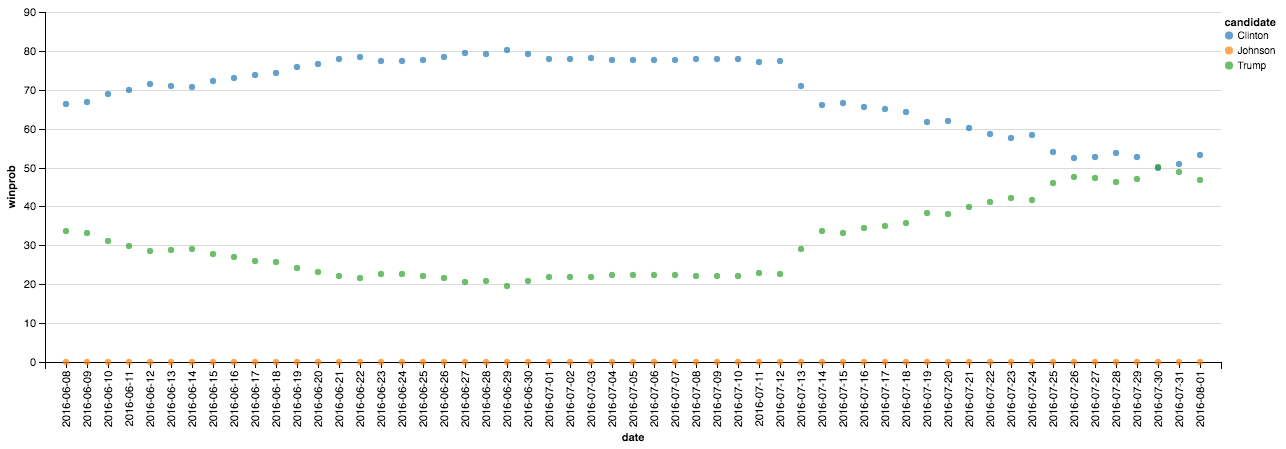

In [98]:
altair.Chart(forecast_df).mark_circle().encode(
    x='date',
    y='winprob',
    color='candidate'
)

In [99]:
predictwise_json = requests.get("http://table-cache1.predictwise.com/history/table_1032.json").text

In [101]:
predictwise = json.loads(predictwise_json)

In [107]:
predictwise.keys()

dict_keys(['name', 'timestamp', 'history', 'shade_cols', 'notes', 'default_sort_dir', 'default_sort', 'suppress_timestamp', 'id', 'header', 'latest'])

In [109]:
history = predictwise['history']

In [134]:
def strip_dollars_as_float(s):
    return float(s.strip('$ '))

predictwise_df = pd.DataFrame({'timestamp': pd.Timestamp(h['timestamp']),
             h['table'][0][0]: strip_dollars_as_float(h['table'][0][2]),
             h['table'][1][0]: strip_dollars_as_float(h['table'][1][2])} for h in history)

In [135]:
predictwise_df.timestamp.values

array(['2015-12-10T12:41:00.000000000', '2015-12-10T16:45:00.000000000',
       '2015-12-10T20:50:00.000000000', ...,
       '2016-08-01T03:30:00.000000000', '2016-08-01T07:31:00.000000000',
       '2016-08-01T11:35:00.000000000'], dtype='datetime64[ns]')

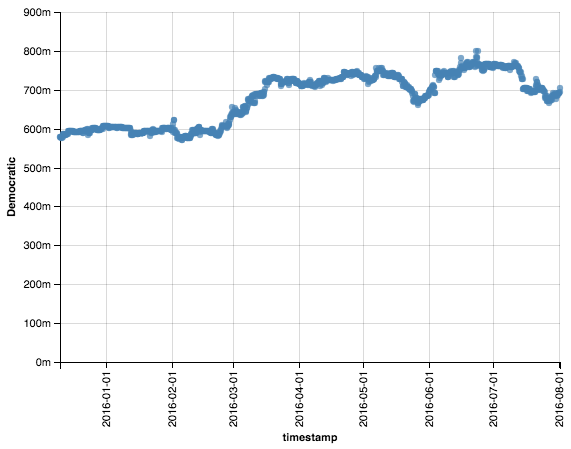

In [136]:
altair.Chart(predictwise_df).mark_circle().encode(
    x='timestamp',
    y='Democratic'
)

In [124]:
predictwise_df

,Democratic,Republican,timestamp
0,$ 0.578,$ 0.418,12-10-2015 12:41PM
1,$ 0.578,$ 0.418,12-10-2015 4:45PM
2,$ 0.578,$ 0.418,12-10-2015 8:50PM
3,$ 0.578,$ 0.418,12-11-2015 12:51AM
4,$ 0.577,$ 0.418,12-11-2015 4:57AM
5,$ 0.577,$ 0.418,12-11-2015 8:56AM
6,$ 0.578,$ 0.418,12-11-2015 12:59PM
7,$ 0.578,$ 0.418,12-11-2015 5:07PM
8,$ 0.587,$ 0.412,12-11-2015 9:13PM
9,$ 0.587,$ 0.412,12-12-2015 1:16AM
